# Importing libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter, ExponentialFitter
from Exponential import ExponentialAFTFitter
from lifelines.utils import k_fold_cross_validation
import seaborn as sns
import warnings

In [78]:
warnings.filterwarnings("ignore")

# Reading and transforming the data

In [110]:
data_path = 'telco.csv'
raw_data = pd.read_csv(data_path)

In [111]:
def process_data(data):
    data = data.copy()
    data.drop(['ID'], axis=1, inplace=True)
    cols = ['region', 'retire', 'marital', 'ed', 'gender', 'voice', 'internet', 'custcat', 'churn', 'forward']
    data = data.copy()
    data = pd.get_dummies(data, columns=cols, drop_first=True)
    data = data.rename(columns={'churn_Yes': 'churn'})
    return data

In [112]:
data = process_data(raw_data)
data

,tenure,age,address,income,region_Zone 2,region_Zone 3,retire_Yes,marital_Unmarried,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,gender_Male,voice_Yes,internet_Yes,custcat_E-service,custcat_Plus service,custcat_Total service,churn,forward_Yes
0,13,44,9,64,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
1,11,33,7,136,0,1,0,0,0,0,1,0,1,1,0,0,0,1,1,1
2,68,52,24,116,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,33,33,12,33,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4,23,30,9,30,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,39,0,27,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
996,7,34,2,22,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
997,67,59,40,944,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,1
998,70,49,18,87,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1


# Fitting AFT Models

In [113]:
weibull_model = WeibullAFTFitter()
log_norm_model = LogNormalAFTFitter()
log_logistic_model = LogLogisticAFTFitter()
exponential_model = ExponentialAFTFitter()

### Weibull 

In [114]:
weibull = weibull_model.fit(data, duration_col='tenure', event_col='churn')
weibull_prediction = weibull.predict_survival_function(data).T
weibull_prediction_avg = weibull_prediction.mean()
weibull.print_summary()

<lifelines.WeibullAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.17
         time fit was run = 2023-04-30 19:24:09 UTC

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                               
lambda_ address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
        age                               0.03       1.03       0.01             0.01             0.04                 1.01                 1.04
        custcat_E-service                 0.98       2.66       0.16             0.67             1.28                 1.96                 3.61
        custcat_Plus service              0.74       2.10       0.19             0.36             1.12                 1.44                 3.06
        custcat_Total service             1.00       2.71       0.21             0.58             1.41                 1.78                 4.11
        ed_Did not complete high school   0.44       1.55       0.19             0.06             0.82                 1.06                 2.27
        ed_High school degree             0.32       1.38       0.15             0.03             0.61                 1.03                 1.83
        ed_Post-undergraduate degree      0.22       1.25       0.19            -0.15             0.60                 0.86                 1.82
        ed_Some college                   0.25       1.29       0.14            -0.03             0.54                 0.97                 1.71
        forward_Yes                      -0.10       0.91       0.15            -0.39             0.19                 0.68                 1.21
        gender_Male                       0.00       1.00       0.10            -0.20             0.21                 0.82                 1.23
        income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        internet_Yes                     -0.77       0.46       0.14            -1.04            -0.50                 0.35                 0.61
        marital_Unmarried                -0.35       0.71       0.10            -0.55            -0.14                 0.58                 0.87
        region_Zone 2                    -0.06       0.94       0.13            -0.31             0.19                 0.73                 1.21
        region_Zone 3                     0.12       1.12       0.13            -0.13             0.36                 0.87                 1.44
        retire_Yes                        0.17       1.19       0.52            -0.85             1.19                 0.43                 3.30
        voice_Yes                        -0.34       0.72       0.15            -0.63            -0.04                 0.53                 0.96
        Intercept                         2.78      16.14       0.27             2.25             3.31                 9.48                27.47
rho_    Intercept                         0.17       1.19       0.05             0.07             0.27                 1.08                 1.32

                                          cmp to     z      p   -log2(p)
param   covariate                                                       
lambda_ address                             0.00  4.69 <0.005      18.47
        age                                 0.00  4.12 <0.005      14.69
        custcat_E-service                   0.00  6.28 <0.005      31.44
        custcat_Plus service                0.00  3.83 <0.005      12.95
        custcat_Total service           

### Log Normal

In [115]:
log_norm = log_norm_model.fit(data, duration_col='tenure', event_col='churn')
log_norm_prediction = log_norm.predict_survival_function(data).T
log_norm_prediction_avg = log_norm_prediction.mean()
log_norm.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2023-04-30 19:24:10 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    address                           0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.07       2.90       0.17             0.73             1.40                 2.08                 4.06
       custcat_Plus service              0.92       2.52       0.22             0.50             1.35                 1.65                 3.85
       custcat_Total service             1.20       3.32       0.25             0.71             1.69                 2.03                 5.42
       ed_Did not complete high school   0.37       1.45       0.20            -0.02             0.77                 0.98                 2.16
       ed_High school degree             0.32       1.37       0.16            -0.00             0.64                 1.00                 1.89
       ed_Post-undergraduate degree     -0.03       0.97       0.22            -0.47             0.40                 0.62                 1.50
       ed_Some college                   0.27       1.31       0.17            -0.05             0.60                 0.95                 1.82
       forward_Yes                      -0.20       0.82       0.18            -0.55             0.15                 0.58                 1.17
       gender_Male                       0.05       1.05       0.11            -0.17             0.28                 0.84                 1.32
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.77       0.46       0.14            -1.05            -0.49                 0.35                 0.61
       marital_Unmarried                -0.46       0.63       0.12            -0.68            -0.23                 0.51                 0.80
       region_Zone 2                    -0.10       0.91       0.14            -0.38             0.18                 0.69                 1.20
       region_Zone 3                     0.05       1.05       0.14            -0.23             0.33                 0.80                 1.38
       retire_Yes                        0.02       1.02       0.44            -0.85             0.89                 0.43                 2.44
       voice_Yes                        -0.43       0.65       0.17            -0.76            -0.10                 0.47                 0.90
       Intercept                         2.36      10.61       0.29             1.79             2.94                 5.98                18.84
sigma_ Intercept                         0.28       1.32       0.05             0.19             0.37                 1.20                 1.44

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    address                             0.00  4.78 <0.005      19.11
       age                                 0.00  4.50 <0.005      17.19
       custcat_E-service                   0.00  6.25 <0.005      31.21
       custcat_Plus service                0.00  4.29 <0.005      15.75
       custcat_Total service               0.00  4.79 <0.005      

### Log Logistic

In [116]:
log_logistic = log_logistic_model.fit(data, duration_col='tenure', event_col='churn')
log_logistic_prediction = log_logistic.predict_survival_function(data).T
log_logistic_prediction_avg = log_logistic_prediction.mean()
log_logistic.print_summary()

<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1458.10
         time fit was run = 2023-04-30 19:24:10 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
alpha_ address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.04       2.83       0.17             0.72             1.36                 2.05                 3.91
       custcat_Plus service              0.86       2.37       0.21             0.45             1.27                 1.57                 3.57
       custcat_Total service             1.20       3.33       0.24             0.73             1.67                 2.08                 5.34
       ed_Did not complete high school   0.43       1.54       0.20             0.04             0.82                 1.05                 2.28
       ed_High school degree             0.34       1.40       0.15             0.03             0.64                 1.03                 1.89
       ed_Post-undergraduate degree     -0.02       0.98       0.22            -0.45             0.40                 0.64                 1.49
       ed_Some college                   0.24       1.27       0.16            -0.06             0.55                 0.94                 1.73
       forward_Yes                      -0.19       0.82       0.17            -0.53             0.14                 0.59                 1.15
       gender_Male                       0.04       1.04       0.11            -0.18             0.26                 0.84                 1.29
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.80       0.45       0.14            -1.07            -0.52                 0.34                 0.60
       marital_Unmarried                -0.45       0.64       0.11            -0.66            -0.23                 0.52                 0.80
       region_Zone 2                    -0.05       0.95       0.14            -0.31             0.22                 0.73                 1.24
       region_Zone 3                     0.11       1.12       0.14            -0.15             0.38                 0.86                 1.46
       retire_Yes                        0.06       1.06       0.48            -0.87             1.00                 0.42                 2.71
       voice_Yes                        -0.40       0.67       0.16            -0.72            -0.08                 0.49                 0.92
       Intercept                         2.33      10.33       0.28             1.78             2.89                 5.95                17.93
beta_  Intercept                         0.34       1.40       0.05             0.24             0.44                 1.27                 1.55

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
alpha_ address                             0.00  4.42 <0.005      16.60
       age                                 0.00  4.67 <0.005      18.36
       custcat_E-service                   0.00  6.30 <0.005      31.62
       custcat_Plus service                0.00  4.13 <0.005      14.74
       custcat_Total service               0.00  5.00 <0.005    

### Exponential

In [117]:
exponential = exponential_model.fit(data, duration_col='tenure', event_col='churn')
exponential_prediction = exponential.predict_survival_function(data).T
exponential_prediction_avg = exponential_prediction.mean()
exponential.print_summary()

<lifelines.ExponentialAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1507.44
         time fit was run = 2023-04-30 19:24:11 UTC

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                               
lambda_ age                               0.09       1.09       0.01             0.07             0.10                 1.08                 1.10
        address                           0.02       1.02       0.01            -0.00             0.04                 1.00                 1.04
        income                           -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        region_Zone 2                     0.25       1.29       0.14            -0.02             0.52                 0.98                 1.69
        region_Zone 3                     0.43       1.54       0.14             0.16             0.70                 1.17                 2.01
        retire_Yes                       -1.04       0.35       0.61            -2.24             0.15                 0.11                 1.16
        marital_Unmarried                -0.18       0.83       0.12            -0.41             0.05                 0.66                 1.05
        ed_Did not complete high school   1.04       2.83       0.21             0.63             1.45                 1.87                 4.28
        ed_High school degree             0.78       2.19       0.16             0.47             1.10                 1.60                 2.99
        ed_Post-undergraduate degree      0.52       1.67       0.22             0.09             0.94                 1.09                 2.57
        ed_Some college                   0.73       2.07       0.16             0.42             1.04                 1.52                 2.82
        gender_Male                       0.15       1.17       0.12            -0.07             0.38                 0.93                 1.47
        voice_Yes                        -0.33       0.72       0.17            -0.66             0.00                 0.52                 1.00
        internet_Yes                     -0.56       0.57       0.14            -0.85            -0.28                 0.43                 0.76
        custcat_E-service                 1.40       4.06       0.17             1.07             1.74                 2.91                 5.68
        custcat_Plus service              1.08       2.95       0.21             0.67             1.49                 1.95                 4.46
        custcat_Total service             1.28       3.60       0.24             0.82             1.75                 2.27                 5.73
        forward_Yes                       0.05       1.05       0.16            -0.27             0.37                 0.76                 1.44

                                          cmp to     z      p   -log2(p)
param   covariate                                                       
lambda_ age                                 0.00 14.54 <0.005     156.61
        address                             0.00  1.74   0.08       3.60
        income                              0.00 -0.35   0.72       0.47
        region_Zone 2                       0.00  1.82   0.07       3.88
        region_Zone 3                       0.00  3.10 <0.005       9.03
        retire_Yes                          0.00 -1.71   0.09       3.52
        marital_Unmarried                   0.00 -1.57   0.12       3.09
        ed_Did not complete high school     0.00  4.92 <0.005      20.13
        ed_High school degree     

### Compare the 4 models

AIC (Akaike information criterion) - The AIC is a measure of the relative quality of a model compared to other models. It takes into account both the goodness of fit of the model and the number of parameters used in the model. Lower AIC values indicate better fitting models. The difference in AIC between two models can be used to compare their relative performance, with a lower difference indicating that one model is a better fit than the other.

In [118]:
print(f'Exponential AIC: {exponential.AIC_}')
print(f'Log-Normal AIC: {log_norm.AIC_}')
print(f'Log-Logistic AIC: {log_logistic.AIC_}')
print(f'Weibull AIC: {weibull.AIC_}')

scores = {'Exponential': exponential.AIC_, 'Log-normal': log_norm.AIC_, 'Log-logistic': log_logistic.AIC_, 'Weibull': weibull.AIC_}
print(f'\nThe best model based on AIC scores is: \033[1m{min(scores, key=scores.get)}\033[0m')

Exponential AIC: 3050.873920498042
Log-Normal AIC: 2954.0240102517123
Log-Logistic AIC: 2956.2085614433336
Weibull AIC: 2964.34324808388

The best model based on AIC scores is: Log-normal


Except the AIC score and the plots, there are some other important factors to consider when choosing the preferred model. 

For example, the complexity of the model is another important factor which is described by the number of the parameters the model has. Log-Normal and Log-Logistic models have both three parameters, while weibull has two and exponential has one parameter. So, exponential model is the least complex model from these four.

Another factor can be the hazard rate. For instance, the Weibull model may be preferred over the exponential model if the data exhibits a non-constant hazard rate, as the Weibull model can capture both increasing and decreasing hazard rates.

However, assuming that I am interested in best performing model, I will concentrate on AIC score and choose Log-normal as the best model.

# Plot

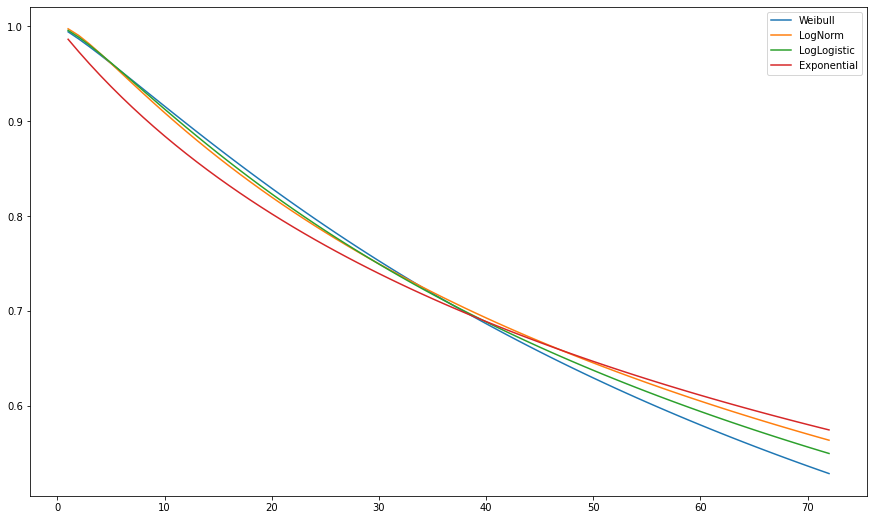

In [119]:
plt.figure(figsize=(15,9))
plt.plot(weibull_prediction_avg, label='Weibull')
plt.plot(log_norm_prediction_avg, label='LogNorm')
plt.plot(log_logistic_prediction_avg, label='LogLogistic')
plt.plot(exponential_prediction_avg, label='Exponential')
plt.legend()
plt.show()

### Keep significant features

Taking those features as significant that are 99% significant. Here is the list:

In [128]:
significant_columns = ["address", "age", "internet_Yes", "marital_Unmarried", "tenure", "churn", "custcat_E-service", "custcat_Plus service", "custcat_Total service", "voice_Yes"]

In [129]:
dropped_data = data[significant_columns]
dropped_data

,address,age,internet_Yes,marital_Unmarried,tenure,churn,custcat_E-service,custcat_Plus service,custcat_Total service,voice_Yes
0,9,44,0,0,13,1,0,0,0,0
1,7,33,0,0,11,1,0,0,1,1
2,24,52,0,0,68,0,0,1,0,0
3,12,33,0,1,33,1,0,0,0,0
4,9,30,0,0,23,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,0,39,0,1,10,0,0,0,0,0
996,2,34,0,1,7,0,0,0,0,0
997,40,59,1,1,67,0,0,0,1,1
998,18,49,0,1,70,0,0,1,0,1


In [130]:
log_norm = log_norm_model.fit(dropped_data, duration_col='tenure', event_col='churn')
log_norm_prediction = log_norm.predict_survival_function(dropped_data).T
log_norm_prediction_avg = log_norm_prediction.mean()
log_norm.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.10
         time fit was run = 2023-04-30 19:26:52 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    address                 0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                     0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service       1.03       2.79       0.17             0.69             1.36                 2.00                 3.89
       custcat_Plus service    0.82       2.28       0.17             0.49             1.15                 1.63                 3.17
       custcat_Total service   1.01       2.75       0.21             0.60             1.42                 1.83                 4.15
       internet_Yes           -0.84       0.43       0.14            -1.11            -0.57                 0.33                 0.57
       marital_Unmarried      -0.45       0.64       0.11            -0.67            -0.22                 0.51                 0.80
       voice_Yes              -0.46       0.63       0.17            -0.79            -0.14                 0.45                 0.87
       Intercept               2.53      12.62       0.24             2.06             3.01                 7.84                20.30
sigma_ Intercept               0.28       1.33       0.05             0.19             0.37                 1.21                 1.45

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    address                   0.00  4.84 <0.005      19.56
       age                       0.00  5.75 <0.005      26.78
       custcat_E-service         0.00  6.07 <0.005      29.53
       custcat_Plus service      0.00  4.85 <0.005      19.66
       custcat_Total service     0.00  4.83 <0.005      19.52
       internet_Yes              0.00 -6.08 <0.005      29.63
       marital_Unmarried         0.00 -3.91 <0.005      13.39
       voice_Yes                 0.00 -2.78   0.01       7.52
       Intercept                 0.00 10.45 <0.005      82.47
sigma_ Intercept                 0.00  6.15 <0.005      30.27
---
Concordance = 0.79
AIC = 2944.20
log-likelihood ratio test = 280.83 on 8 df
-log2(p) of ll-ratio test = 183.73

# CLV

In [132]:
clv_data = log_norm_prediction.copy()

Taking some conventional numbers for margin and r

In [133]:
margin = 1000
sequence = range(1,len(clv_data.columns)+1)
r = 0.1

In [134]:
for i in sequence:
    clv_data.loc[:, i] = clv_data.loc[:, i]/((1+r/12)**(sequence[i-1]-1))

In [135]:
clv_data["CLV"] = margin * clv_data.sum(axis = 1)
clv_data

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,CLV
0,0.999688,0.989880,0.978868,0.966893,0.954194,0.940967,0.927370,0.913526,0.899533,0.885469,...,0.363526,0.357889,0.352351,0.346911,0.341567,0.336317,0.331159,0.326092,0.321112,43421.920852
1,0.999736,0.990127,0.979439,0.967868,0.955620,0.942870,0.929761,0.916405,0.902892,0.889296,...,0.373555,0.367869,0.362283,0.356792,0.351396,0.346093,0.340880,0.335756,0.330720,44012.968135
2,0.999999,0.991724,0.983496,0.975307,0.967152,0.959028,0.950934,0.942869,0.934834,0.926828,...,0.561230,0.555839,0.550497,0.545202,0.539956,0.534757,0.529605,0.524500,0.519441,53279.464095
3,0.997985,0.982516,0.963596,0.942708,0.920782,0.898406,0.875956,0.853676,0.831726,0.810209,...,0.236111,0.231513,0.227024,0.222639,0.218356,0.214171,0.210084,0.206089,0.202185,34882.879434
4,0.999870,0.990870,0.981213,0.970970,0.960245,0.949137,0.937733,0.926110,0.914328,0.902440,...,0.413868,0.408046,0.402314,0.396671,0.391115,0.385646,0.380260,0.374959,0.369738,46287.751605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.996036,0.975404,0.950272,0.923094,0.895196,0.867318,0.839884,0.813132,0.787198,0.762150,...,0.187415,0.183429,0.179547,0.175765,0.172079,0.168488,0.164988,0.161575,0.158249,30970.665732
996,0.995073,0.972135,0.944405,0.914717,0.884526,0.854605,0.825374,0.797056,0.769766,0.743549,...,0.172052,0.168286,0.164620,0.161053,0.157579,0.154197,0.150903,0.147695,0.144569,29633.260935
997,0.999991,0.991651,0.983268,0.974822,0.966311,0.957738,0.949110,0.940436,0.931725,0.922986,...,0.518455,0.512743,0.507093,0.501505,0.495977,0.490511,0.485104,0.479757,0.474468,51473.533992
998,0.999923,0.991186,0.982008,0.972409,0.962449,0.952190,0.941692,0.931008,0.920183,0.909257,...,0.440037,0.434174,0.428396,0.422700,0.417087,0.411554,0.406100,0.400725,0.395427,47681.088097


In [57]:
raw_data["CLV"] = clv_data.CLV

From the above results we can see that those customers that are more probably staying with the company are having higher CLV

# Visualizing CLV vs. Features

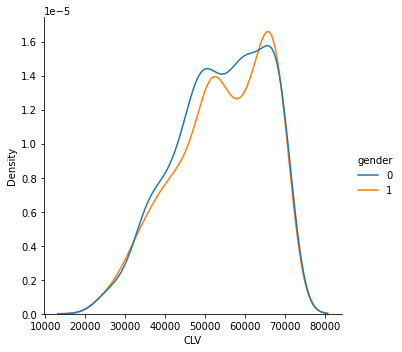

In [58]:
sns.displot(data=raw_data, kind='kde', x='CLV', hue='gender')

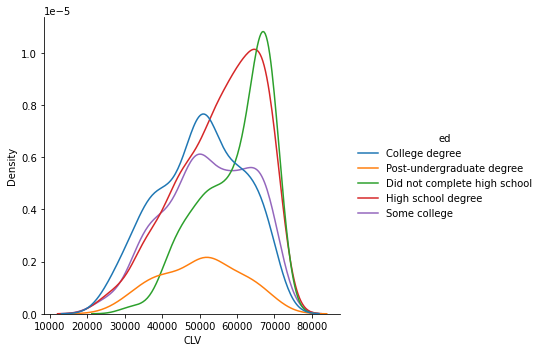

In [59]:
sns.displot(data=raw_data, kind='kde', x='CLV', hue='ed')

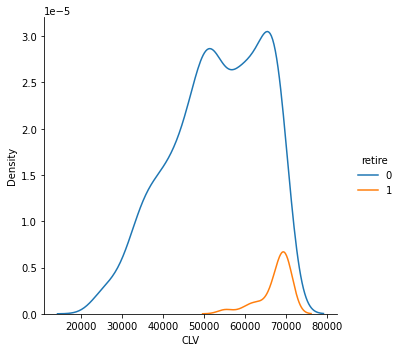

In [60]:
sns.displot(data=raw_data, kind='kde', x='CLV', hue='retire')

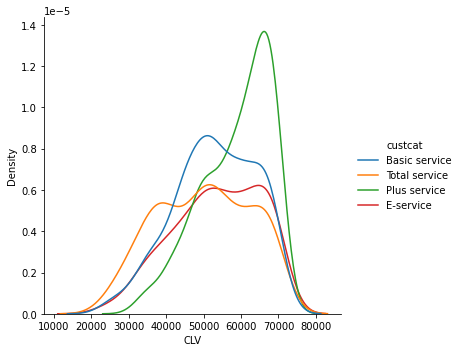

In [61]:
sns.displot(data=raw_data, kind='kde', x='CLV', hue='custcat')

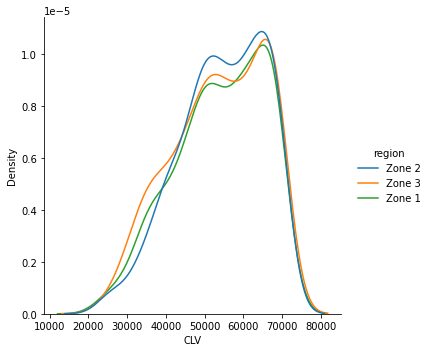

In [62]:
sns.displot(data=raw_data, kind='kde', x='CLV', hue='region')

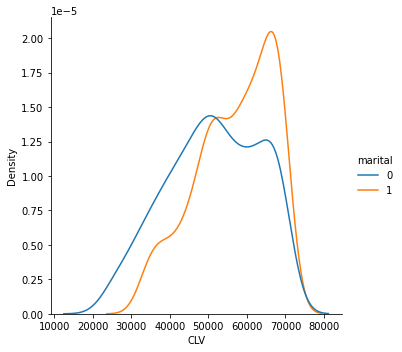

In [63]:
sns.displot(data=raw_data, kind='kde', x='CLV', hue='marital')

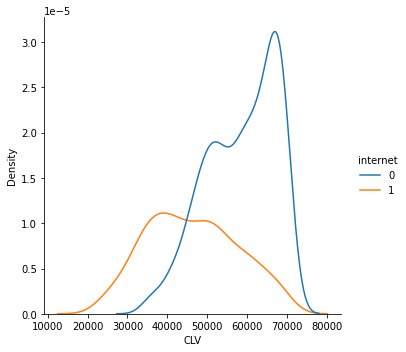

In [64]:
sns.displot(data=raw_data, kind='kde', x='CLV', hue='internet')

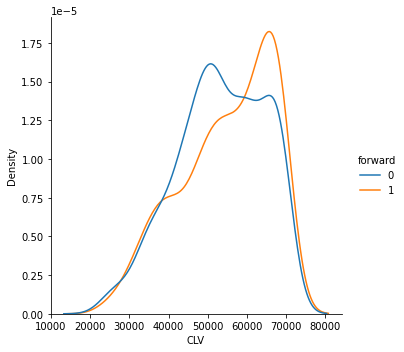

In [65]:
sns.displot(data=raw_data, kind='kde', x='CLV', hue='forward')

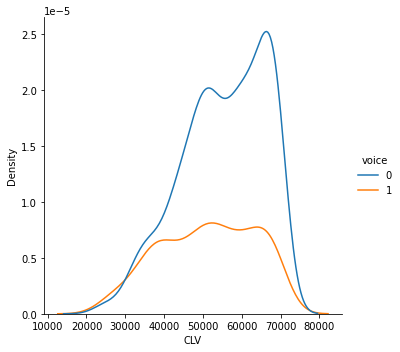

In [66]:
sns.displot(data=raw_data, kind='kde', x='CLV', hue='voice')

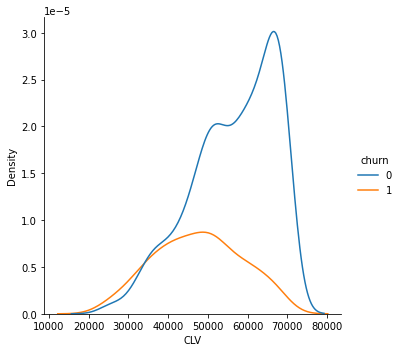

In [67]:
sns.displot(data=raw_data, kind='kde', x='CLV', hue='churn')

In [72]:
print(raw_data.groupby("gender")[["CLV"]].mean())
print(raw_data.groupby("voice")[["CLV"]].mean())
print(raw_data.groupby("forward")[["CLV"]].mean())
print(raw_data.groupby("internet")[["CLV"]].mean())
print(raw_data.groupby("marital")[["CLV"]].mean())
print(raw_data.groupby("region")[["CLV"]].mean())
print(raw_data.groupby("custcat")[["CLV"]].mean())
print(raw_data.groupby("retire")[["CLV"]].mean())
print(raw_data.groupby("ed")[["CLV"]].mean())

                 CLV
gender              
0       53904.818313
1       54145.920036
                CLV
voice              
0      55295.411015
1      51104.159141
                  CLV
forward              
0        53219.353408
1        54845.959975
                   CLV
internet              
0         58535.694198
1         46268.238348
                  CLV
marital              
0        51241.962511
1        56856.726015
                 CLV
region              
Zone 1  54011.379379
Zone 2  54530.491176
Zone 3  53536.111141
                        CLV
custcat                    
Basic service  53002.522358
E-service      53519.101651
Plus service   58760.886719
Total service  49987.903695
                 CLV
retire              
0       53359.427142
1       67441.199563
                                       CLV
ed                                        
College degree                50221.968818
Did not complete high school  59556.671458
High school degree            55293.151

# Conclusions

Customer Lifetime Value (CLV) is an important metric that helps businesses understand the value of a customer over their entire relationship with the company.    

Accelerated Failure Time (AFT) models are a type of survival analysis that is used to model the time it takes for an event to occur, such as customer churn. AFT models are useful for predicting the survival time of customers and for identifying factors that affect customer churn. 


In our study, CLV and AFT are negative correlated. Which means that the higher is the CLV, the lower is the risk of churn. 

The coefficients:

- Positive coefficients indicate that an increase in the corresponding variable increases the expected lifetime of the customer.
- Negative coefficients indicate that an increase in the corresponding variable decreases the expected lifetime of the customer.
- The magnitude of the coefficient indicates the strength of the effect of the corresponding variable on the customer lifetime.

Note: The coefficients are sensitive to different scales of the data (See below)

"The most valuable segments" are those segments that provide the highest value in average to the company. The highest CLV in average have the retired people, then the people who did not complete high school. We may connect this pheonomenon with the fact that more educated people or younger people are more demanding.

Some suggestions for retention:

- Listen to customer feedback and respond promptly to any issues or concerns they may have. Especially for younger people.
- Offer to loyal customers exclusive discounts, special offers, or other perks. Especially for younger people.
- It seems the company has some problems with internet. Since the CLV for customers having internet is a problem.








## Retention budget

Taking some arbitrary values for retention rate and cost per customer

In [167]:
dropped_data["CLV"] = clv_data.CLV

In [168]:
retained_customers = dropped_data[dropped_data['churn'] == 0]
retained_clv = retained_customers['CLV'].sum()

In [169]:
retention_rate = 0.8
cost_per_customer = 5000
retention_cost = len(dropped_data) * retention_rate * cost_per_customer

In [170]:
annual_budget = retained_clv - retention_cost
annual_budget

27470982.863718566

# Scaling the features (Experiment)

I think for making the coefficients meaningful, it is important that all the features are all in the same scale. That's why, I will scale the data using MinMaxScaler and try the same experiment to see the differences.

In [137]:
from sklearn.preprocessing import MinMaxScaler

In [145]:
scaler = MinMaxScaler()

In [146]:
scaled = scaler.fit_transform(dropped_data)

In [152]:
scaled_data = pd.DataFrame(scaled_data, columns = dropped_data.columns) + 10**(-100)

In [153]:
scaled_data.describe()

,address,age,internet_Yes,marital_Unmarried,tenure,churn,custcat_E-service,custcat_Plus service,custcat_Total service,voice_Yes
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,2.100182e-01,4.014237e-01,3.680000e-01,5.050000e-01,4.862817e-01,2.740000e-01,2.170000e-01,2.810000e-01,2.360000e-01,3.040000e-01
std,1.833942e-01,2.128613e-01,4.825027e-01,5.002252e-01,3.008424e-01,4.462321e-01,4.124089e-01,4.497124e-01,4.248347e-01,4.602128e-01
min,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100
25%,5.454545e-02,2.372881e-01,1.000000e-100,1.000000e-100,2.253521e-01,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100
50%,1.636364e-01,3.728814e-01,1.000000e-100,1.000000e+00,4.647887e-01,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100,1.000000e-100
75%,3.272727e-01,5.593220e-01,1.000000e+00,1.000000e+00,7.464789e-01,1.000000e+00,1.000000e-100,1.000000e+00,1.000000e-100,1.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [154]:
log_norm = log_norm_model.fit(scaled_data, duration_col='tenure', event_col='churn')
log_norm_prediction = log_norm.predict_survival_function(scaled_data).T
log_norm_prediction_avg = log_norm_prediction.mean()
log_norm.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 0 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 1000
           log-likelihood = -668.06
         time fit was run = 2023-04-30 19:48:05 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    address                 4.11      61.15       5.89            -7.43            15.66                 0.00             6.33e+06
       age                    11.94   1.53e+05       5.06             2.02            21.85                 7.57             3.07e+09
       custcat_E-service       8.16    3495.31       2.42             3.42            12.90                30.57             4.00e+05
       custcat_Plus service    5.61     273.29       2.25             1.20            10.02                 3.33             22444.81
       custcat_Total service  10.63   41279.06       3.13             4.49            16.77                88.82             1.92e+07
       internet_Yes           -3.28       0.04       1.99            -7.17             0.61                 0.00                 1.84
       marital_Unmarried      -3.74       0.02       1.62            -6.91            -0.57                 0.00                 0.57
       voice_Yes              -1.01       0.37       2.45            -5.81             3.79                 0.00                44.40
       Intercept             -12.09       0.00       2.38           -16.75            -7.43                 0.00                 0.00
sigma_ Intercept               3.24      25.41       0.02             3.19             3.28                24.32                26.55

                               cmp to      z      p   -log2(p)
param  covariate                                              
mu_    address                   0.00   0.70   0.49       1.04
       age                       0.00   2.36   0.02       5.78
       custcat_E-service         0.00   3.37 <0.005      10.40
       custcat_Plus service      0.00   2.49   0.01       6.31
       custcat_Total service     0.00   3.39 <0.005      10.49
       internet_Yes              0.00  -1.65   0.10       3.34
       marital_Unmarried         0.00  -2.31   0.02       5.59
       voice_Yes                 0.00  -0.41   0.68       0.55
       Intercept                 0.00  -5.09 <0.005      21.38
sigma_ Intercept                 0.00 144.69 <0.005        inf
---
Concordance = 0.79
AIC = 1356.11
log-likelihood ratio test = 44.38 on 8 df
-log2(p) of ll-ratio test = 20.98

Now, the address variable is not significant. Customer categories are still significant, the age is also significant for 98%. The coefficients should work better and provide right insights for scaled data.